In [6]:
from config.config import Config
from models.load_model import Model
from utils.data_utils import generate_prompts
from utils.compute_utils import compute_avg_distances
import torch
from sklearn.decomposition import PCA
model_name = Config.MODEL_NAME
device = Config.DEVICE
model = Model(model_name, device)
# fix the seeds
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /home/bhaskar_mukhoty/.cache/huggingface/token
Login successful


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
prompt = 'what birth year of Messi?'
model.predict(prompt)

'what birth year of Messi?\nHe'

In [31]:
def generate_symbol_prompts(symbol_list, group_size):
    # Join all symbols except the last one with commas
    context = ','.join([f"{sym}={sym}" for sym in symbol_list[:-1]])
    # The last input before = should have `group_size` symbols
    last_input = ''.join(symbol_list[-group_size:])
    return f"{context},{last_input}="

import random
import itertools
random.seed(42)

# Function to generate symbols dynamically for a given group size
def generate_symbols(group_size, num_examples):
    # Define the alphabet
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    # Generate all possible combinations of length `group_size`
    symbols = [''.join(comb) for comb in itertools.product(alphabet, repeat=group_size)]
    # Shuffle the symbols to ensure randomness
    random.shuffle(symbols)
    # If num_examples exceeds the number of possible symbols, reuse symbols
    if num_examples > len(symbols):
        symbols = random.choices(symbols, k=num_examples)
    else:
        symbols = symbols[:num_examples]
    return symbols

def generate_prompts(k, num_examples, group_range, context='random'):
    prompts = {}
    for i in group_range:
        # Generate symbols dynamically for the current group size
        interval = generate_symbols(i, k * (num_examples + 1))
        symbs = [interval[j * (num_examples + 1):(j + 1) * (num_examples + 1)] for j in range(k)]

        prompts[i] = []
        for symb_group in symbs:
            if context == 'random':
                # Randomly select symbols for the context
                context_symbols = symb_group[:num_examples]
            elif context == 'fixed':
                # Use a fixed set of symbols for the context
                context_symbols = ['A', 'B', 'C']
            else:
                # Use the first `num_examples` symbols from the interval
                context_symbols = interval[:num_examples]
            
            # The last input should have `i` symbols (group size)
            if len(symb_group) >= num_examples + 1:
                last_input_symbols = [symb_group[-1]]  # Use the last symbol in the group
                full_symbol_list = context_symbols + last_input_symbols
                prompts[i].append(generate_symbol_prompts(full_symbol_list, i))
            else:
                # Handle cases where there aren't enough symbols
                print(f"Warning: Not enough symbols for group {i}. Skipping this prompt.")
    
    return prompts

# Example usage:
group_range = range(1, 5)  # Group sizes from 1 to 4
k= 30
prompts = generate_prompts(k=30, num_examples=3, group_range=group_range, context='random')

# Print the generated prompts
for key, value in prompts.items():
    print(f"Group {key}:")
    for prompt in value:
        print(prompt)

Group 1:
N=N,H=H,Q=Q,V=
Y=Y,P=P,T=T,D=
P=P,J=J,J=J,I=
N=N,V=V,Y=Y,O=
U=U,W=W,X=X,H=
C=C,I=I,N=N,Y=
M=M,G=G,K=K,J=
F=F,J=J,K=K,C=
W=W,W=W,G=G,F=
D=D,C=C,N=N,T=
Y=Y,T=T,W=W,U=
C=C,X=X,R=R,H=
V=V,G=G,Q=Q,P=
F=F,G=G,D=D,I=
P=P,R=R,L=L,A=
S=S,F=F,F=F,X=
F=F,N=N,A=A,L=
G=G,U=U,O=O,J=
M=M,J=J,C=C,V=
L=L,M=M,W=W,U=
O=O,U=U,I=I,Q=
Y=Y,R=R,O=O,F=
C=C,J=J,S=S,S=
D=D,I=I,F=F,O=
T=T,A=A,I=I,K=
C=C,N=N,Z=Z,E=
X=X,V=V,O=O,Q=
P=P,Q=Q,D=D,I=
H=H,K=K,M=M,I=
D=D,J=J,B=B,M=
Group 2:
XU=XU,RQ=RQ,EG=EG,EGPQ=
PM=PM,RA=RA,TA=TA,TAMR=
SN=SN,LE=LE,KI=KI,KIFW=
GJ=GJ,WU=WU,UR=UR,URXJ=
UN=UN,LQ=LQ,QO=QO,QOBX=
QV=QV,BK=BK,TI=TI,TIQH=
VK=VK,ZW=ZW,MT=MT,MTSD=
CP=CP,XI=XI,GQ=GQ,GQLW=
PC=PC,JM=JM,HQ=HQ,HQNW=
XH=XH,YG=YG,MS=MS,MSCV=
IN=IN,ZN=ZN,UO=UO,UOQK=
JR=JR,UY=UY,LO=LO,LOIY=
XD=XD,JF=JF,ZG=ZG,ZGNQ=
OX=OX,WG=WG,PD=PD,PDUE=
ZK=ZK,BC=BC,DJ=DJ,DJMB=
HC=HC,DC=DC,BS=BS,BSQG=
ZX=ZX,UW=UW,TJ=TJ,TJEZ=
AY=AY,UV=UV,GK=GK,GKDH=
KQ=KQ,IQ=IQ,BH=BH,BHBT=
MA=MA,GS=GS,VZ=VZ,VZDO=
XA=XA,AD=AD,RS=RS,RSBW=
MN=MN,YO=YO,HS=HS,HSOU=
VM=V

In [32]:
model.model.config.num_hidden_layers

32

In [33]:
import matplotlib.pyplot as plt
import torch

# Parameters
layers = list(range(0, 32, 1))

# Initialize a dictionary to save all layers' hidden states
all_layers_hidden_states = {}

# Iterate through each layer
for idx, layer in enumerate(layers):
    hidden_states = {}
    answers = {} # assuming the model answer the last number
    # Collect hidden states for each prompt in each group
    for key, prompt_list in prompts.items():
        hidden_states[key] = []
        answers[key] = []
        for prompt in prompt_list:
            hidden_state = model.get_hidden_state(prompt, layer_index=layer)
            hidden_states[key].append(hidden_state)
            last_number = prompt[prompt.rfind(',')+1:prompt.rfind('=')]
            answers[key].append(last_number)
    
    # Save the hidden states and answers for the current layer
    all_layers_hidden_states[layer] = {'hidden_states': hidden_states, 'answers': answers}

In [2]:
new_array = [0]*k + [1]*k + [2]*k + [3]*k
another_array = [10]*k + [100]*k + [1000]*k + [10000]*k

NameError: name 'k' is not defined

In [45]:
from utils import compute_group_structure_score

layer0 has a problem
Layer 1 - Explained Variance: 0.732 -0.22408215652017133 -1.0 0.5518356869596573
Layer 2 - Explained Variance: 0.680 -0.06965797314375272 -1.0 0.8606840537124946
Layer 3 - Explained Variance: 0.570 0.5759769243871362 1.0 0.15195384877427245
Layer 4 - Explained Variance: 0.548 0.4914942747395217 1.0 -0.0170114505209566
Layer 5 - Explained Variance: 0.491 0.42897856222814057 1.0 -0.1420428755437188
Layer 6 - Explained Variance: 0.464 0.7554437065962231 1.0 0.5108874131924461
Layer 7 - Explained Variance: 0.461 0.6260788567657295 1.0 0.252157713531459
Layer 8 - Explained Variance: 0.496 0.7816116771798278 1.0 0.5632233543596558
Layer 9 - Explained Variance: 0.510 0.3361861850030674 1.0 -0.32762762999386524
Layer 10 - Explained Variance: 0.516 0.4418348234690092 1.0 -0.11633035306198161
Layer 11 - Explained Variance: 0.522 0.5350686354851594 1.0 0.07013727097031873
Layer 12 - Explained Variance: 0.529 0.36549416709568155 1.0 -0.2690116658086369
Layer 13 - Explained Var

Layer 30 - Explained Variance: 0.237 0.3517883934966515 1.0 -0.29642321300669705
Layer 31 - Explained Variance: 0.242 -0.616186499090232 -1.0 -0.23237299818046409


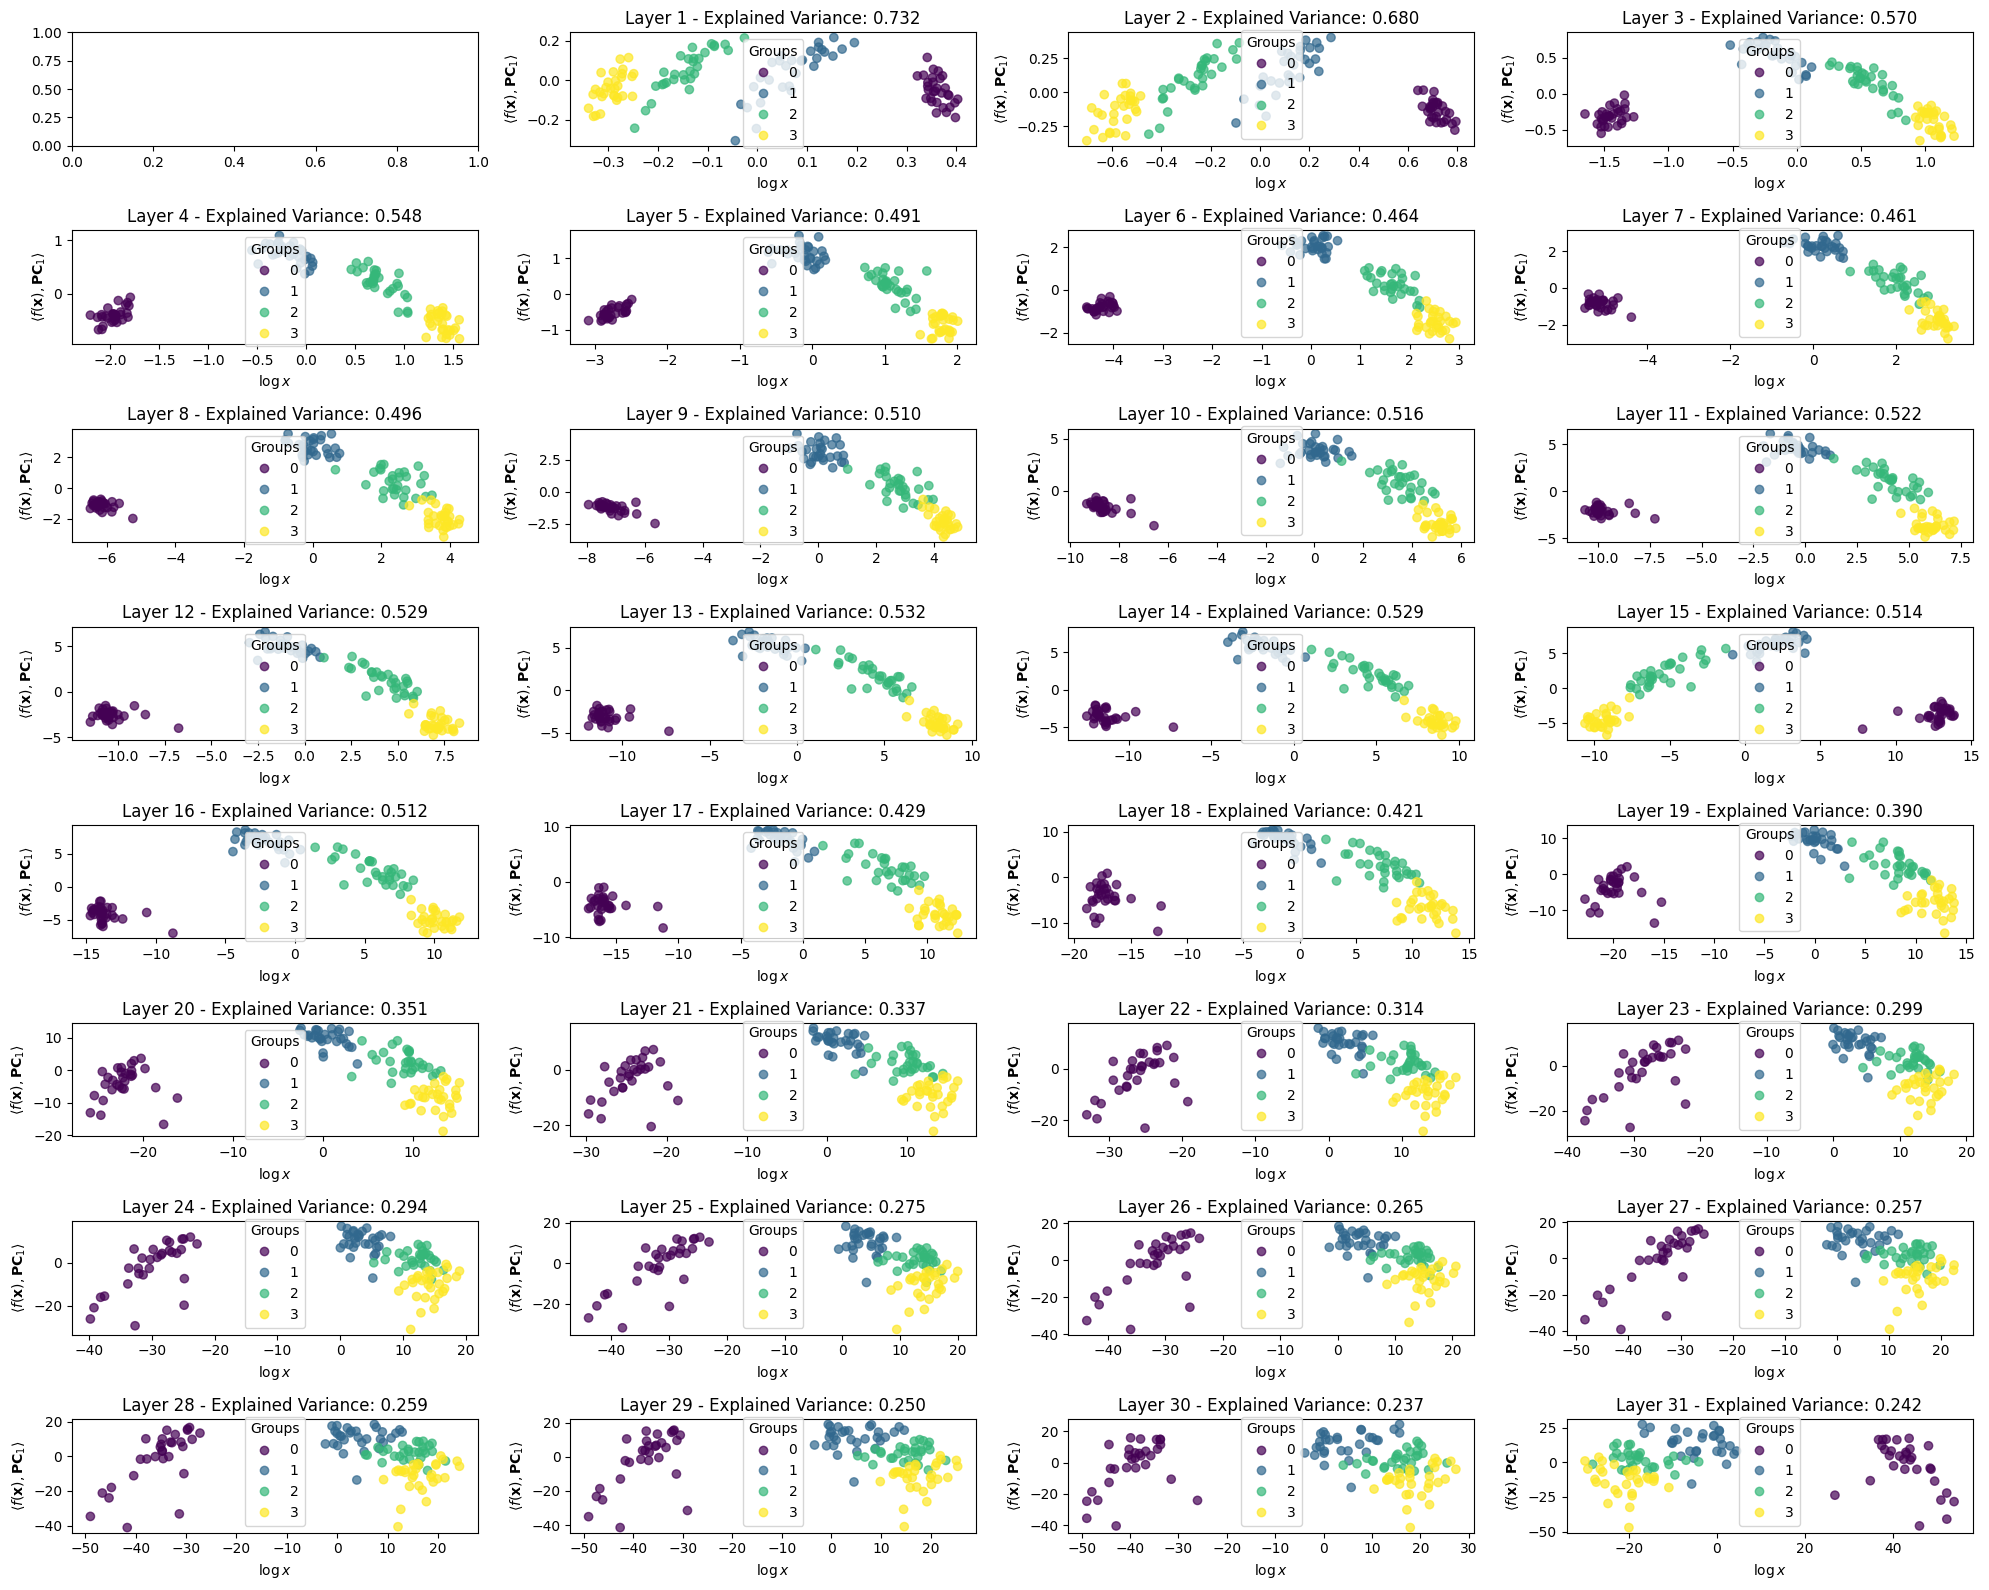

In [48]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Initialize a figure with subplots for each layer, two plots per row
fig, axs = plt.subplots(8, 4, figsize=(20, 16))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

# Iterate through each layer
for idx, (layer, hidden_states) in enumerate(all_layers_hidden_states.items()):
    all_representations = []
    all_answers = []
    for group, reps in hidden_states['hidden_states'].items():
        for rep, answer in zip(reps, hidden_states['answers'][group]):
            all_representations.append(rep.cpu().numpy())
            all_answers.append(answer)    

    all_representations = np.array(all_representations).squeeze(1)
    # all_answers = np.array(all_answers, dtype=float)
    try:
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(all_representations)
        gss, ms, vs = compute_group_structure_score(principal_components[:, 0], new_array, group_sizes=[1, 2, 3, 4])
        print(f'Layer {layer} - Explained Variance: {pca.explained_variance_ratio_.sum():.3f}',gss,ms,vs)
    except ValueError as e:
        print(f'layer{idx} has a problem')
        continue
    # z = np.polyfit(np.log10(all_answers), principal_components[:, 0], 1)
    # p = np.poly1d(z)
    # Plotting for each layer
    scatter = axs[idx].scatter((principal_components[:, 0]),(principal_components[:, 1]), c=new_array, cmap='viridis', alpha=0.7)
    # scatter = axs[idx].scatter(np.log10(another_array),(principal_components[:, 0]), c=new_array, cmap='viridis', alpha=0.7)
    # scatter = axs[idx].scatter(np.log(principal_components[:, 0]),np.ones_like(all_answers), c=new_array, cmap='viridis', alpha=0.7)
    # scatter = axs[idx].scatter(range(len(principal_components[:, 0])), principal_components[:, 0], c=new_array, cmap='viridis', alpha=0.7)
    axs[idx].legend(*scatter.legend_elements(), title="Groups")
    # axs[idx].set_title(f'Layer {layer} - PC1 vs PC2')
    axs[idx].set_title(f'Layer {layer} - Explained Variance: {pca.explained_variance_ratio_.sum():.3f}')
    axs[idx].set_xlabel('$\log{x}$')
    axs[idx].set_ylabel('$\\langle f(\mathbf{x}), \mathbf{PC}_1 \\rangle$')

plt.tight_layout()
plt.show()

In [41]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def compute_group_structure_score(hidden_states, group_labels, group_sizes):
    """
    Compute the Group Structure Score (GSS) for a given set of hidden states and group labels.
    
    Args:
        hidden_states (np.array): Hidden states of shape (n_samples, n_features).
        group_labels (list): Group labels for each sample.
        group_sizes (list): Sizes of the groups.
    
    Returns:
        GSS (float): Group Structure Score.
        MS (float): Monotonicity Score.
        VS (float): Variance Score.
    """
    # Step 1: Perform PCA and extract PC1
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(hidden_states).flatten()
    
    # Step 2: Compute group means
    group_means = []
    for group in np.unique(group_labels):
        group_means.append(np.mean(pc1[group_labels == group]))
    
    # Step 3: Compute Monotonicity Score (MS)
    ms, _ = spearmanr(group_sizes, group_means)
    
    # Step 4: Compute Variance Score (VS)
    group_variances = []
    for group in np.unique(group_labels):
        group_variances.append(np.var(pc1[group_labels == group]))
    
    # Fit linear regression of log(variance) vs. log(group size)
    X = np.log(group_sizes).reshape(-1, 1)
    y = np.log(group_variances)
    reg = LinearRegression().fit(X, y)
    vs = reg.coef_[0]  # Slope of the regression line
    
    # Step 5: Compute Group Structure Score (GSS)
    w1, w2 = 0.5, 0.5  # Weights for MS and VS
    gss = w1 * ms + w2 * vs
    
    return gss, ms, vs

# Example usage:
# hidden_states: Replace with your actual hidden states (n_samples, n_features)
# group_labels: Replace with your actual group labels (list of length n_samples)
# group_sizes: Replace with your actual group sizes (list of unique group sizes)

# For numbers case
hidden_states_numbers = all_representations#np.random.rand(100, 10)  # Replace with actual hidden states
group_labels_numbers = np.random.choice([1, 2, 3, 4], 120)  # Replace with actual group labels
group_sizes_numbers = [1, 2, 3, 4]  # Replace with actual group sizes

gss_numbers, ms_numbers, vs_numbers = compute_group_structure_score(hidden_states_numbers, group_labels_numbers, group_sizes_numbers)
print(f"Numbers Case - GSS: {gss_numbers}, MS: {ms_numbers}, VS: {vs_numbers}")

# For letters case
hidden_states_letters = np.random.rand(100, 10)  # Replace with actual hidden states
group_labels_letters = np.random.choice([1, 2, 3, 4], 100)  # Replace with actual group labels
group_sizes_letters = [1, 2, 3, 4]  # Replace with actual group sizes

gss_letters, ms_letters, vs_letters = compute_group_structure_score(hidden_states_letters, group_labels_letters, group_sizes_letters)
print(f"Letters Case - GSS: {gss_letters}, MS: {ms_letters}, VS: {vs_letters}")

Numbers Case - GSS: -0.1634128344819653, MS: -0.19999999999999998, VS: -0.1268256689639306
Letters Case - GSS: 0.02878126966323155, MS: 0.39999999999999997, VS: -0.34243746067353686
